Trích xuất đặc trưng

In [1]:
import pandas as pd
import numpy as np
import os
from urllib.parse import urlparse
from tld import get_tld, is_tld
import re
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

In [64]:
dir_path='FinalDataset/URL'

In [65]:
dir=os.listdir(dir_path)
data_list=[]
class_names=[]
dem=0
for file in dir:
    file_path=dir_path+'/'+file
    data=pd.read_csv(file_path,header=None)
    data=data.rename(columns={0:'url'})
    label=file.split('.')[0]
    data['type_name']=label
    data['type']=dem
    dem+=1
    data_list.append(data)
    class_names.append(label)
print(len(data_list))
print(class_names)

5
['Benign_list_big_final', 'DefacementSitesURLFiltered', 'Malware_dataset', 'phishing_dataset', 'spam_dataset']


In [66]:
big_data=pd.concat(data_list,ignore_index=True)
big_data

,url,type_name,type
0,http://1337x.to/torrent/1048648/American-Snipe...,Benign_list_big_final,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,Benign_list_big_final,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,Benign_list_big_final,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,Benign_list_big_final,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,Benign_list_big_final,0
...,...,...,...
165361,http://archive.salisburyjournal.co.uk/2001/3/7/,spam_dataset,4
165362,http://astore.amazon.co.uk/allezvinsfrenchr/de...,spam_dataset,4
165363,http://archive.thisischeshire.co.uk/2000/1/14/...,spam_dataset,4
165364,http://applerugs.co.uk/rugs/product_info.php?p...,spam_dataset,4


In [67]:
big_data.isnull().sum()

url          0
type_name    0
type         0
dtype: int64

In [68]:
big_data.shape

(165366, 3)

In [69]:
big_data=big_data.sample(frac=1).reset_index(drop=True)
big_data

,url,type_name,type
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1
2,http://indianexpress.com/article/cities/mumbai...,Benign_list_big_final,0
3,http://www.easy-process.de/de/eigenes-wissensm...,DefacementSitesURLFiltered,1
4,http://mic.com/articles/105628/10-uplifting-ph...,Benign_list_big_final,0
...,...,...,...
165361,http://antenassaojose.com.br/site/index.php?vi...,DefacementSitesURLFiltered,1
165362,http://olx.co.id/riau/q-%7Bq%7D/?utm_source=go...,Benign_list_big_final,0
165363,http://amazon.co.uk/b/ref=amb_link_19556165_4/...,spam_dataset,4
165364,https://500px.com/photo/13728217/freeski-proje...,Benign_list_big_final,0


In [71]:
big_data['url_len']=big_data['url'].apply(lambda x: len(str(x)))
big_data.head(2)

,url,type_name,type,url_len
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100


In [19]:
def get_domain(url):
    try:
        res=get_tld(url,as_object=True,fail_silently=False,fix_protocol=True)
        pri_domain=res.parsed_url.netloc
    except:
        pri_domain=None
    return pri_domain

In [20]:
big_data['domain']=big_data['url'].apply(lambda x: get_domain(x))
big_data.head(2)

,url,type_name,type,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,shortening_service,contain_ip_address
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,www.zselicpaintball.hu,0,0,0,0,3,...,0,0,0,1,1,0,0,33,0,0
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,sohacogroup.com.vn,0,1,0,4,4,...,0,0,0,1,1,0,5,77,0,0


In [77]:
chars=['@','?','-','=','.','#','%','+','$','!','*',',','//']
for char in chars:
    big_data[char]=big_data['url'].apply(lambda x: x.count(char))
big_data.head(2)

,url,type_name,type,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,astore.amazon.co.uk,0,0,0,0,3,0,0,0,0,0,0,0,1
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,archive.salisburyjournal.co.uk,0,1,0,4,4,0,0,0,0,0,0,0,1


In [14]:
def abnormal_url(url):
    hostname=urlparse(url).hostname
    hostname=str(hostname)
    match=re.search(hostname,url)
    if match:
        return 1
    else:
        return 0
    

In [16]:
big_data['abnormal_url']=big_data['url'].apply(lambda x: abnormal_url(x))
big_data.head(2)

,url,type_name,type,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,shortening_service,contain_ip_address
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,astore.amazon.co.uk,0,0,0,0,3,...,0,0,0,1,1,0,0,33,0,0
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,archive.salisburyjournal.co.uk,0,1,0,4,4,...,0,0,0,1,1,0,5,77,0,0


<Axes: xlabel='abnormal_url', ylabel='count'>

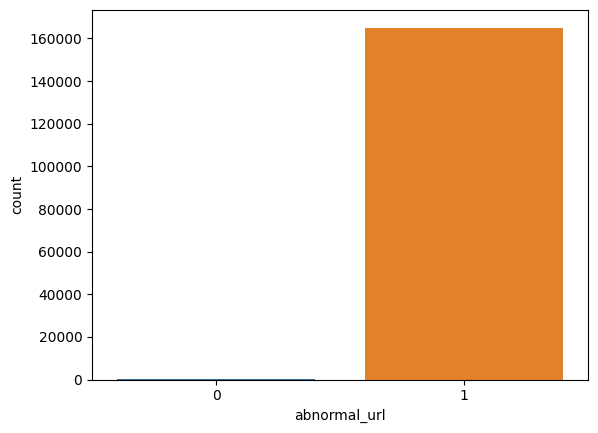

In [17]:
sns.countplot(x='abnormal_url',data=big_data)

In [85]:
len(big_data[big_data['abnormal_url']==0])

33

In [86]:
def http_secure(url):
    http=urlparse(url).scheme
    match=str(http)
    if match=='https':
        return 1
    else:
        return 0

In [87]:
big_data['https']=big_data['url'].apply(lambda x: http_secure(x))
big_data.head(2)

,url,type_name,type,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,astore.amazon.co.uk,0,0,0,0,3,0,0,0,0,0,0,0,1,1.0,0
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,archive.salisburyjournal.co.uk,0,1,0,4,4,0,0,0,0,0,0,0,1,1.0,0


<Axes: xlabel='https', ylabel='count'>

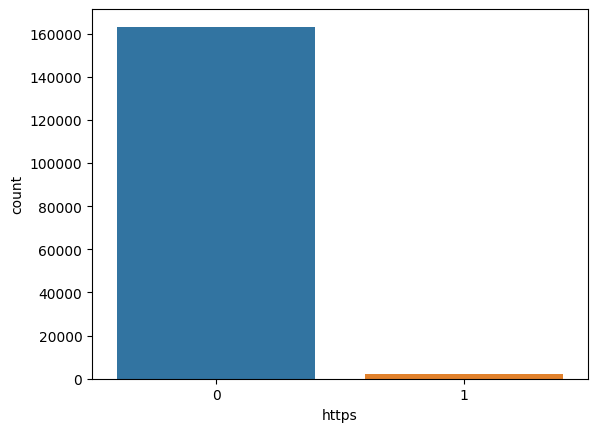

In [88]:
sns.countplot(x='https',data=big_data)

In [91]:
def digit_count(url):
    digits=0
    for c in url:
        if c.isnumeric():
            digits+=1
    return digits

In [92]:
big_data['digits']=big_data['url'].apply(lambda x: digit_count(x))
big_data.head(2)

,url,type_name,type,url_len,domain,@,?,-,=,.,...,%,+,$,!,*,",",//,abnormal_url,https,digits
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,astore.amazon.co.uk,0,0,0,0,3,...,0,0,0,0,0,0,1,1.0,0,0
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,archive.salisburyjournal.co.uk,0,1,0,4,4,...,0,0,0,0,0,0,1,1.0,0,5


In [93]:
def letter_count(url):
    letters=0
    for c in url:
        if c.isalpha():
            letters+=1
    return letters

In [94]:
big_data['letters']=big_data['url'].apply(lambda x: letter_count(x))
big_data.head(2)

,url,type_name,type,url_len,domain,@,?,-,=,.,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,astore.amazon.co.uk,0,0,0,0,3,...,0,0,0,0,0,1,1.0,0,0,33
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,archive.salisburyjournal.co.uk,0,1,0,4,4,...,0,0,0,0,0,1,1.0,0,5,77


In [95]:
def find_shortening_service(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net', url)
    if match:
        return 1
    else:
        return 0

In [96]:
big_data['shortening_service']=big_data['url'].apply(lambda x: find_shortening_service(x))
big_data.head(2)

,url,type_name,type,url_len,domain,@,?,-,=,.,...,$,!,*,",",//,abnormal_url,https,digits,letters,shortening_service
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,astore.amazon.co.uk,0,0,0,0,3,...,0,0,0,0,1,1.0,0,0,33,0
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,archive.salisburyjournal.co.uk,0,1,0,4,4,...,0,0,0,0,1,1.0,0,5,77,0


<Axes: xlabel='shortening_service', ylabel='count'>

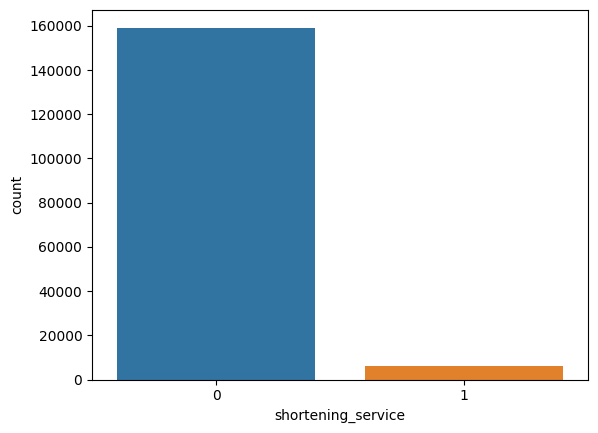

In [98]:
sns.countplot(x='shortening_service',data=big_data)

In [99]:
def contain_ip_address(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)
    if match:
        return 1
    else:
        return 0

In [100]:
big_data['contain_ip_address']=big_data['url'].apply(lambda x: contain_ip_address(x))
big_data.head(2)

,url,type_name,type,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,shortening_service,contain_ip_address
0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,astore.amazon.co.uk,0,0,0,0,3,...,0,0,0,1,1.0,0,0,33,0,0
1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,archive.salisburyjournal.co.uk,0,1,0,4,4,...,0,0,0,1,1.0,0,5,77,0,0


<Axes: xlabel='contain_ip_address', ylabel='count'>

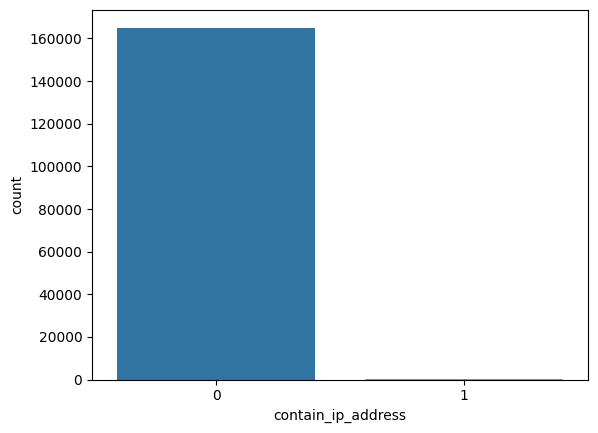

In [102]:
sns.countplot(x='contain_ip_address',data=big_data)

In [104]:
len(big_data[big_data['contain_ip_address']==1])

261

<Axes: >

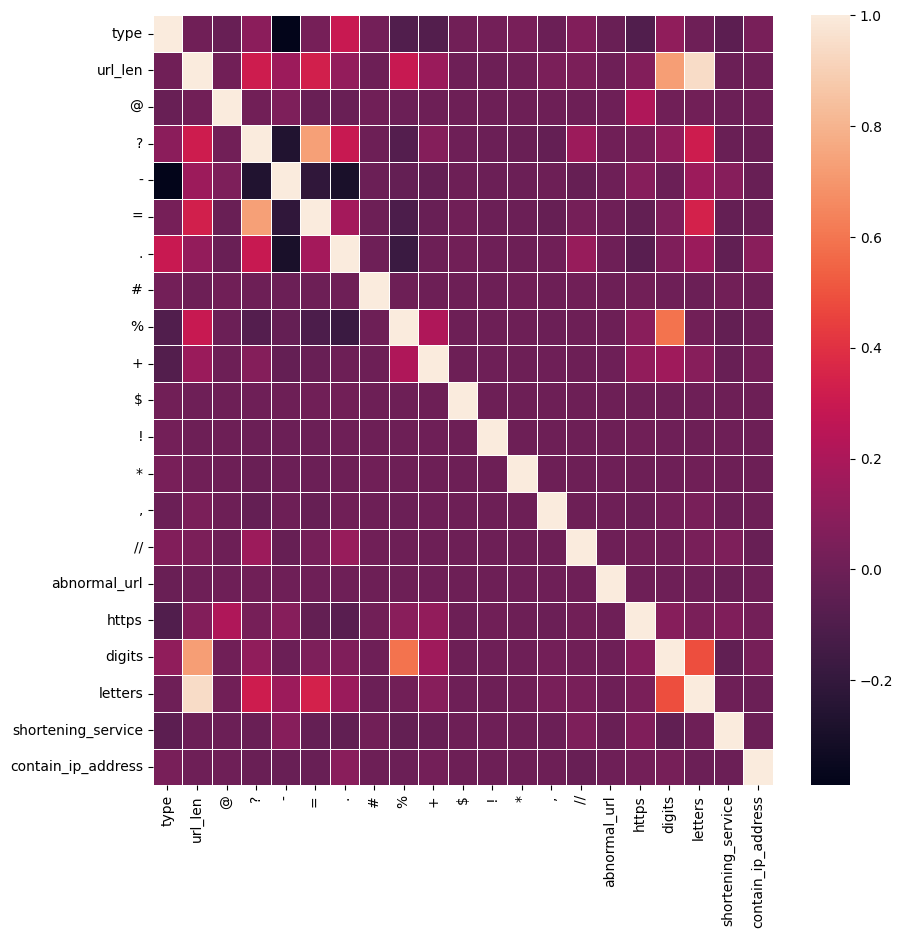

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(big_data.select_dtypes(include='number').corr(),linewidths=.5)

In [110]:
big_data.shape

(165366, 24)

In [22]:
big_data[big_data['domain'].isnull()]

,url,type_name,type,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,shortening_service,contain_ip_address
89,http://64.79.102.163/modulo/santanderbrasil/in...,phishing_dataset,3,62,None,0,0,0,0,4,...,0,0,0,1,1,0,10,42,0,1
687,http://222.35.89.134/www.discovericard.html,phishing_dataset,3,43,None,0,0,0,0,5,...,0,0,0,1,1,0,10,24,0,1
1750,https://84.203.152.12/recordings/3/www.paypal....,phishing_dataset,3,93,None,0,0,0,2,7,...,0,0,0,1,1,1,11,63,0,1
1958,'http://amazon.co.uk/s/ref=amb_link_38340765_6...,spam_dataset,4,264,None,0,1,5,10,2,...,0,0,0,1,0,0,69,139,0,0
2486,http://85.125.204.59/jod-fcc/fcc-authenticatio...,phishing_dataset,3,58,None,0,0,2,0,4,...,0,0,0,1,1,0,10,36,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161452,http://219.232.244.89/intl/update/webscr2.php?...,phishing_dataset,3,202,None,0,1,1,2,4,...,0,0,0,1,1,0,93,92,0,1
162181,http://91.218.115.241/~logincom/aapf/jspaapf.I...,phishing_dataset,3,66,None,0,0,0,2,4,...,0,0,0,1,1,0,12,38,0,1
162830,http://66.184.94.210/paypal/index.php,phishing_dataset,3,37,None,0,0,0,0,4,...,0,0,0,1,1,0,10,18,0,1
163425,'http://archives.li.man.ac.uk/ead/search/?oper...,spam_dataset,4,389,None,0,1,0,6,6,...,0,0,0,1,0,0,63,265,0,0


Lưu dữ liệu

In [23]:
big_data.to_csv('BIG_DATA.csv')